#**CEFET/RJ Nova Friburgo**
##**Gestão do Conhecimento e da Informação**
###Teste de Qui-Quadrado
####Professor Rafael Escalfoni
*Material adaptado do curso "Data Analysis Tools - Wesleyan University"*

Antes de começar, vamos caracterizar a nossa questão de pesquisa, variáveis e hipóteses.

---

###**Questão de pesquisa**
Qual é a frequência que uma pessoa fuma relacionada ao vício de nicotina?

Frequência com que uma pessoa fuma está relacionada  a dependência à nicotina? São fatos dependentes?



> As taxas de dependência de nicotina são iguais ou diferentes entre os indivíduos de diferentes categorias de frequência de fumantes?



####**População**
Jovens adultos fumantes

####**Variáveis**

*   Variável independente: Frequência de fumo **USFREQMO**, categórica com 6 níveis:

1.   Fumar aprox.  1 dia por mês
2.   Fumar aprox. 2,5 dias por mês
3.   Fumar aprox.  5 dias por mês
4.   Fumar aprox. 14 dias por mês
5.   Fumar aprox. 22 dias por mês
6.   Fumar aprox. 30 dias por mês


*   Variável dependente: Dependência de nicotina **TAB12MDX** categórica com 2 níveis
1.   Presença de dependência de nicotina nos últimos 12 meses
2.   Ausência de dependência de nicotina nos últimos 12 meses



####Hipótese

**Hipótese Nula**

> Não existe relação entre frequência de fumo e dependência de nicotina

**Hipótese Alternativa**

> Existe relação entre frequência de fumo e dependência de nicotina


###Ao código!

Passo 1. Importar as bibliotecas que serão utilizadas ao longo do código.

  No nosso caso, importaremos a **pandas**, para lidar com dataframes; **numpy**, para funções matemáticas; **stats** para os modelos estatísticos; **seaborn** e **matplotlib** para gráficos.

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Jul 26 19:06:08 2020

@author: ldierker and rafaelescalfoni

"""

import pandas
import numpy
import scipy.stats
import seaborn
import matplotlib.pyplot as plt

Passo 2. Carregando o nosso dataset (no nosso caso o NESARC)

*O Colab não está carregando o dataset inteiro, por isso nossos exemplos estão ficando diferentes dos resultados rodados localmente.*

In [3]:
data = pandas.read_csv('./datasets/nesarc_pds.csv', low_memory=False)

Passo 3. Convertendo dados brutos para tipos numéricos

In [4]:
data['TAB12MDX'] = pandas.to_numeric(data['TAB12MDX'], errors='coerce')
data['CHECK321'] = pandas.to_numeric(data['CHECK321'], errors='coerce')
data['S3AQ3B1'] = pandas.to_numeric(data['S3AQ3B1'], errors='coerce')
data['S3AQ3C1'] = pandas.to_numeric(data['S3AQ3C1'], errors='coerce')
data['AGE'] = pandas.to_numeric(data['AGE'], errors='coerce')


Passo 4. Selecionando a população do estudo - Jovens entre 18 e 25 anos e que tenham fumado nos últimos 12 meses (variável CHECK321)

In [5]:
sub1=data[(data['AGE']>=18) & (data['AGE']<=25) & (data['CHECK321']==1)]

Passo 5. Fazer um clone do subconjunto para evitar problemas...

In [6]:
sub2 = sub1.copy()

Passo 6. Hora de tratar os valores ausentes

In [7]:
# recode missing values to python missing (NaN)
sub2['S3AQ3B1']=sub2['S3AQ3B1'].replace(9, numpy.nan)
sub2['S3AQ3C1']=sub2['S3AQ3C1'].replace(99, numpy.nan)

Passo 7. Categorizando as frequências de fumos; criando a variável USFREQMO

In [8]:
recode1 = {1: 30, 2: 22, 3: 14, 4: 6, 5: 2.5, 6: 1}
sub2['USFREQMO']= sub2['S3AQ3B1'].map(recode1)


Passo 8. Vamos dar uma conferida nos dados? Tabela de valores observados.

In [9]:
ct1=pandas.crosstab(sub2['TAB12MDX'], sub2['USFREQMO'])
print (ct1)

# coluna de percentagens
# soma todos os valores por coluna (axis=0)
colsum=ct1.sum(axis=0)
# valor da categoria/total
colpct=ct1/colsum
print(colpct)


USFREQMO  1.0   2.5   6.0   14.0  22.0  30.0
TAB12MDX                                    
0           64    53    69    59    41   521
1            7    12    19    32    27   799
USFREQMO      1.0       2.5       6.0       14.0      22.0      30.0
TAB12MDX                                                            
0         0.901408  0.815385  0.784091  0.648352  0.602941  0.394697
1         0.098592  0.184615  0.215909  0.351648  0.397059  0.605303


Passo 9. Aplicando Qui-quadrado

In [10]:
print ('Valor de Qui-quadrado, Valor p, valores esperados')
cs1= scipy.stats.chi2_contingency(ct1)
print (cs1)


Valor de Qui-quadrado, Valor p, valores esperados
(165.27320708055845, 7.436364208390599e-34, 5, array([[ 33.64474457,  30.80152672,  41.70052848,  43.1221374 ,
         32.22313564, 625.50792719],
       [ 37.35525543,  34.19847328,  46.29947152,  47.8778626 ,
         35.77686436, 694.49207281]]))


Podemos refutar a Hipótese Nula!

p < 5%


Agora precisamos analisar a influência da frequência de fumo no vício de nicotina. Para isto, devemos verificar os percentuais do grupo que manifestou dependência (TAB12MDX = 1)

Passo 10. Configurando as variáveis de interesse

In [11]:
# USFREQMO passa a ser uma variável do tipo categórica 
sub2["USFREQMO"] = sub2["USFREQMO"].astype('category')
# new code for setting variables to numeric:
sub2['TAB12MDX'] = pandas.to_numeric(sub2['TAB12MDX'], errors='coerce')


Plotando os valores encontrados com o Seaborn:

/opt/anaconda3/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())
/opt/anaconda3/lib/python3.7/site-packages/pandas/io/formats/format.py:1403: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


Text(6.799999999999997, 0.5, 'Proporção de Dependência de Nicotina')

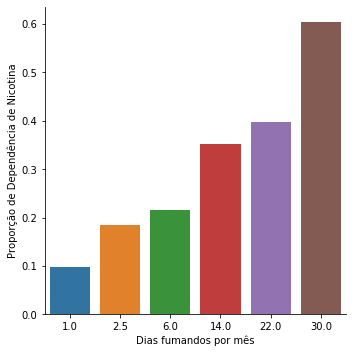

In [24]:
seaborn.catplot(x="USFREQMO", y="TAB12MDX", data=sub2, kind="bar", ci=None) #factorplot
plt.xlabel('Dias fumandos por mês')
plt.ylabel('Proporção de Dependência de Nicotina')


Nem todas as faixas tem a mesma distinção de valores. 

**Para quais valores existem correlações claras?**

##*Post Hoc* Test com qui-quadrado

Criando grupos novos para escolher apenas dois grupos de frequência por vez.

###Grupos 1 e 2

In [25]:
recode2 = {1: 1, 2.5: 2.5}
sub2['COMP1v2']= sub2['USFREQMO'].map(recode2)

# pegando apenas as frequencias de 1 e 2
ct2=pandas.crosstab(sub2['TAB12MDX'], sub2['COMP1v2'])
print (ct2)

# percentuais por colunas
colsum=ct2.sum(axis=0)
colpct=ct2/colsum
print(colpct)

print ('Valor de Qui-quadrado, Valor p, Valores esperados')
cs2= scipy.stats.chi2_contingency(ct2)
print (cs2)

COMP1v2   1.0  2.5
TAB12MDX          
0          64   53
1           7   12
COMP1v2        1.0       2.5
TAB12MDX                    
0         0.901408  0.815385
1         0.098592  0.184615
Valor de Qui-quadrado, Valor p, Valores esperados
(1.4348930637007287, 0.2309675448977717, 1, array([[61.08088235, 55.91911765],
       [ 9.91911765,  9.08088235]]))


Grupos 1 e 3

In [26]:
recode3 = {1: 1, 6: 6}
sub2['COMP1v6']= sub2['USFREQMO'].map(recode3)

# pegando apenas as frequencias de 1 e 3
ct3=pandas.crosstab(sub2['TAB12MDX'], sub2['COMP1v6'])
print (ct3)

# percentuais por coluna
colsum=ct3.sum(axis=0)
colpct=ct3/colsum
print(colpct)

print ('Valor de Qui-quadrado, Valor p, Valores esperados')
cs3= scipy.stats.chi2_contingency(ct3)
print (cs3)

COMP1v6   1.0  6.0
TAB12MDX          
0          64   69
1           7   19
COMP1v6        1.0       6.0
TAB12MDX                    
0         0.901408  0.784091
1         0.098592  0.215909
Valor de Qui-quadrado, Valor p, Valores esperados
(3.142840191220936, 0.07626090198286821, 1, array([[59.38993711, 73.61006289],
       [11.61006289, 14.38993711]]))


Grupos 1 e 4

In [27]:
recode4 = {1: 1, 14: 14}
sub2['COMP1v14']= sub2['USFREQMO'].map(recode4)

# pegando apenas as frequencias de 1 e 4
ct4=pandas.crosstab(sub2['TAB12MDX'], sub2['COMP1v14'])
print (ct4)

# percentuais por coluna
colsum=ct4.sum(axis=0)
colpct=ct4/colsum
print(colpct)

print ('Valor de Qui-quadrado, Valor p, Valores esperados')
cs4= scipy.stats.chi2_contingency(ct4)
print (cs4)

COMP1v14  1.0   14.0
TAB12MDX            
0           64    59
1            7    32
COMP1v14      1.0       14.0
TAB12MDX                    
0         0.901408  0.648352
1         0.098592  0.351648
Valor de Qui-quadrado, Valor p, Valores esperados
(12.622564075461572, 0.00038111819882681824, 1, array([[53.90740741, 69.09259259],
       [17.09259259, 21.90740741]]))


Grupos 1 e 5

In [28]:
recode5 = {1: 1, 22: 22}
sub2['COMP1v22']= sub2['USFREQMO'].map(recode5)

# pegando apenas as frequencias de 1 e 5
ct5=pandas.crosstab(sub2['TAB12MDX'], sub2['COMP1v22'])
print (ct5)

# percentuais por coluna
colsum=ct5.sum(axis=0)
colpct=ct5/colsum
print(colpct)

print ('Valor de Qui-quadrado, Valor p, Valores esperados')
cs5= scipy.stats.chi2_contingency(ct5)
print (cs5)


COMP1v22  1.0   22.0
TAB12MDX            
0           64    41
1            7    27
COMP1v22      1.0       22.0
TAB12MDX                    
0         0.901408  0.602941
1         0.098592  0.397059
Valor de Qui-quadrado, Valor p, Valores esperados
(15.169488833230059, 9.827865291318501e-05, 1, array([[53.63309353, 51.36690647],
       [17.36690647, 16.63309353]]))


Grupos 1 e 6

In [29]:
recode6 = {1: 1, 30: 30}
sub2['COMP1v30']= sub2['USFREQMO'].map(recode6)

# pegando apenas as frequencias de 1 e 5
ct6=pandas.crosstab(sub2['TAB12MDX'], sub2['COMP1v30'])
print (ct6)

# percentuais por coluna
colsum=ct6.sum(axis=0)
colpct=ct6/colsum
print(colpct)

print ('Valor de Qui-quadrado, Valor p, Valores esperados')
cs6= scipy.stats.chi2_contingency(ct6)
print (cs6)

COMP1v30  1.0   30.0
TAB12MDX            
0           64   521
1            7   799
COMP1v30      1.0       30.0
TAB12MDX                    
0         0.901408  0.394697
1         0.098592  0.605303
Valor de Qui-quadrado, Valor p, Valores esperados
(68.92471874488487, 1.0229460827061155e-16, 1, array([[ 29.85981308, 555.14018692],
       [ 41.14018692, 764.85981308]]))


Grupos 2 e 3

In [19]:
recode7 = {2.5: 2.5, 6: 6}
sub2['COMP2v6']= sub2['USFREQMO'].map(recode7)

# pegando apenas as frequencias de 2 e 3
ct7=pandas.crosstab(sub2['TAB12MDX'], sub2['COMP2v6'])
print (ct7)

# percentuais por coluna
colsum=ct7.sum(axis=0)
colpct=ct7/colsum
print(colpct)

print ('Valor de Qui-quadrado, Valor p, Valores esperados')
cs7=scipy.stats.chi2_contingency(ct7)
print (cs7)

COMP2v6   2.5  6.0
TAB12MDX          
0          53   69
1          12   19
COMP2v6        2.5       6.0
TAB12MDX                    
0         0.815385  0.784091
1         0.184615  0.215909
Valor de Qui-quadrado, Valor p, Valores esperados
(0.07430561076945266, 0.7851679729700605, 1, array([[51.83006536, 70.16993464],
       [13.16993464, 17.83006536]]))


Grupos 2 e 4

In [21]:
recode8 = {2.5: 2.5, 14: 14}
sub2['COMP2v14']= sub2['USFREQMO'].map(recode8)

# pegando apenas as frequencias de 2 e 4
ct8=pandas.crosstab(sub2['TAB12MDX'], sub2['COMP2v14'])
print (ct8)

# percentuais por coluna
colsum=ct8.sum(axis=0)
colpct=ct8/colsum
print(colpct)

print ('Valor de Qui-quadrado, Valor p, Valores esperados')
cs8=scipy.stats.chi2_contingency(ct8)
print (cs8)

COMP2v6   2.5   14.0
TAB12MDX            
0           53    59
1           12    32
COMP2v6       2.5       14.0
TAB12MDX                    
0         0.815385  0.648352
1         0.184615  0.351648
Valor de Qui-quadrado, Valor p, Valores esperados
(4.431818181818181, 0.03527491197129336, 1, array([[46.66666667, 65.33333333],
       [18.33333333, 25.66666667]]))


Grupos 2 e 5

In [22]:
recode9 = {2.5: 2.5, 22: 22}
sub2['COMP2v22']= sub2['USFREQMO'].map(recode9)

# pegando apenas as frequencias de 2 e 5
ct9=pandas.crosstab(sub2['TAB12MDX'], sub2['COMP2v22'])
print (ct9)

# percentuais por coluna
colsum=ct9.sum(axis=0)
colpct=ct9/colsum
print(colpct)

print ('Valor de Qui-quadrado, Valor p, Valores esperados')
cs9=scipy.stats.chi2_contingency(ct9)
print (cs9)

COMP2v6   2.5   22.0
TAB12MDX            
0           53    41
1           12    27
COMP2v6       2.5       22.0
TAB12MDX                    
0         0.815385  0.602941
1         0.184615  0.397059
Valor de Qui-quadrado, Valor p, Valores esperados
(6.248385015909925, 0.012430659126995465, 1, array([[45.93984962, 48.06015038],
       [19.06015038, 19.93984962]]))


Grupos 2 e 6

In [ ]:
recode10 = {2.5: 2.5, 30: 30}
sub2['COMP2v30']= sub2['USFREQMO'].map(recode9)

# pegando apenas as frequencias de 2 e 6
ct10=pandas.crosstab(sub2['TAB12MDX'], sub2['COMP2v30'])
print (ct10)

# percentuais por coluna
colsum=ct10.sum(axis=0)
colpct=ct10/colsum
print(colpct)

print ('Valor de Qui-quadrado, Valor p, Valores esperados')
cs10=scipy.stats.chi2_contingency(ct10)
print (cs10)

Grupos 3 e 4

In [ ]:
recode11 = {6: 6, 14: 14}
sub2['COMP3v14']= sub2['USFREQMO'].map(recode11)

# pegando apenas as frequencias de 3 e 4
ct11=pandas.crosstab(sub2['TAB12MDX'], sub2['COMP3v14'])
print (ct11)

# percentuais por coluna
colsum=ct11.sum(axis=0)
colpct=ct11/colsum
print(colpct)

print ('Valor de Qui-quadrado, Valor p, Valores esperados')
cs11=scipy.stats.chi2_contingency(ct11)
print (cs11)

Grupos 3 e 5

In [ ]:
recode12 = {6: 6, 22: 22}
sub2['COMP3v22']= sub2['USFREQMO'].map(recode12)

# pegando apenas as frequencias de 3 e 5
ct12=pandas.crosstab(sub2['TAB12MDX'], sub2['COMP3v22'])
print (ct12)

# percentuais por coluna
colsum=ct12.sum(axis=0)
colpct=ct12/colsum
print(colpct)

print ('Valor de Qui-quadrado, Valor p, Valores esperados')
cs11=scipy.stats.chi2_contingency(ct12)
print (cs12)

Grupos 3 e 6

In [ ]:
recode13 = {6: 6, 30: 30}
sub2['COMP3v30']= sub2['USFREQMO'].map(recode13)

# pegando apenas as frequencias de 3 e 6
ct13=pandas.crosstab(sub2['TAB12MDX'], sub2['COMP3v30'])
print (ct13)

# percentuais por coluna
colsum=ct13.sum(axis=0)
colpct=ct13/colsum
print(colpct)

print ('Valor de Qui-quadrado, Valor p, Valores esperados')
cs11=scipy.stats.chi2_contingency(ct13)
print (cs13)

Grupos 4 e 5

In [ ]:
recode14 = {14: 14, 22: 22}
sub2['COMP4v22']= sub2['USFREQMO'].map(recode14)

# pegando apenas as frequencias de 4 e 5
ct14=pandas.crosstab(sub2['TAB12MDX'], sub2['COMP4v22'])
print (ct14)

# percentuais por coluna
colsum=ct14.sum(axis=0)
colpct=ct14/colsum
print(colpct)

print ('Valor de Qui-quadrado, Valor p, Valores esperados')
cs11=scipy.stats.chi2_contingency(ct14)
print (cs14)

Grupos 4 e 6

In [ ]:
recode15 = {14: 14, 30: 30}
sub2['COMP4v30']= sub2['USFREQMO'].map(recode15)

# pegando apenas as frequencias de 3 e 6
ct15=pandas.crosstab(sub2['TAB12MDX'], sub2['COMP4v30'])
print (ct15)

# percentuais por coluna
colsum=ct15.sum(axis=0)
colpct=ct15/colsum
print(colpct)

print ('Valor de Qui-quadrado, Valor p, Valores esperados')
cs11=scipy.stats.chi2_contingency(ct15)
print (cs15)

Grupos 5 e 6

In [ ]:
recode16 = {22: 22, 30: 30}
sub2['COMP5v30']= sub2['USFREQMO'].map(recode16)

# pegando apenas as frequencias de 5 e 6
ct16=pandas.crosstab(sub2['TAB12MDX'], sub2['COMP5v30'])
print (ct16)

# percentuais por coluna
colsum=ct16.sum(axis=0)
colpct=ct16/colsum
print(colpct)

print ('Valor de Qui-quadrado, Valor p, Valores esperados')
cs11=scipy.stats.chi2_contingency(ct16)
print (cs16)

No código abaixo, verifico se pessoas que presenciaram algum tipo de violência na infância tiveram algum tipo de prejuízo na educação (deixaram a escola)

In [ ]:
data = pandas.read_csv('addhealth.csv', low_memory=False)

# new code setting variables you will be working with to numeric
data['H1GI21'] = pandas.to_numeric(data['H1GI21'], errors='coerce')
data['H1FV1'] = pandas.to_numeric(data['H1FV1'], errors='coerce')


#subset data to young adults who left the school before graduate
sub1=data[(data['H1GI21']==97) & (data['H1GI21']==4)]

#make a copy of my new subsetted data
sub2 = data.copy()

# recode missing values to python missing (NaN)
sub2['H1GI21']=sub2['H1GI21'].replace(4, numpy.nan)
sub2['H1GI21']=sub2['H1GI21'].replace(6, numpy.nan)
sub2['H1GI21']=sub2['H1GI21'].replace(96, numpy.nan)
sub2['H1GI21']=sub2['H1GI21'].replace(97, numpy.nan)
sub2['H1GI21']=sub2['H1GI21'].replace(98, numpy.nan)

sub2['H1FV1']=sub2['H1FV1'].replace(6, numpy.nan)
sub2['H1FV1']=sub2['H1FV1'].replace(8, numpy.nan)
sub2['H1FV1']=sub2['H1FV1'].replace(9, numpy.nan)


#recoding values for H1FV1 into a new variable, GROUPWITVIOLENCE
# 1 - never presence violence; 2: presence once; 3: presence more than once
recode1 = {0: 0, 1: 1, 2: 2}
sub2['GROUPWITVIOLENCE']= sub2['H1FV1'].map(recode1)

# contingency table of observed counts
ct1=pandas.crosstab(sub2['H1GI21'], sub2['GROUPWITVIOLENCE'])
print (ct1)

# column percentages
colsum=ct1.sum(axis=0)
colpct=ct1/colsum
print(colpct)

# chi-square
print ('chi-square value, p value, expected counts')
cs1= scipy.stats.chi2_contingency(ct1)
print (cs1)

# set variable types 
sub2["GROUPWITVIOLENCE"] = sub2["GROUPWITVIOLENCE"].astype('category')
# new code for setting variables to numeric:
sub2['H1GI21'] = pandas.to_numeric(sub2['H1GI21'], errors='coerce')

# graph percent with people who left school within each witnesses violence group 
seaborn.factorplot(x="GROUPWITVIOLENCE", y="H1GI21", data=sub2, kind="bar", ci=None)
plt.xlabel('Groups by number of episodes of violence')
plt.ylabel('Number of young people who gave up the school')

recode2 = {0: 0, 1: 1}
sub2['COMP1v1']= sub2['GROUPWITVIOLENCE'].map(recode2)

# contingency table of observed counts
ct2=pandas.crosstab(sub2['H1GI21'], sub2['COMP1v1'])
print (ct2)

# column percentages
colsum=ct2.sum(axis=0)
colpct=ct2/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs2= scipy.stats.chi2_contingency(ct2)
print (cs2)

recode3 = {0: 0, 2: 2}
sub2['COMP1v2']= sub2['GROUPWITVIOLENCE'].map(recode3)

# contingency table of observed counts
ct3=pandas.crosstab(sub2['H1GI21'], sub2['COMP1v2'])
print (ct3)

# column percentages
colsum=ct3.sum(axis=0)
colpct=ct3/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs3= scipy.stats.chi2_contingency(ct3)
print (cs3)

recode3 = {1: 1, 2: 2}
sub2['COMP1v3']= sub2['GROUPWITVIOLENCE'].map(recode3)

# contingency table of observed counts
ct4=pandas.crosstab(sub2['H1GI21'], sub2['COMP1v3'])
print (ct4)

# column percentages
colsum=ct4.sum(axis=0)
colpct=ct4/colsum
print(colpct)

print ('chi-square value, p value, expected counts')
cs4= scipy.stats.chi2_contingency(ct4)
print (cs4)


